In [10]:
# importing necessary modules
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
# visulization Models
import matplotlib.pyplot as plt 
import seaborn as sns


##from sklearn.metrics import r2_score
##from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import tree
from pydotplus import graph_from_dot_data


from pydotplus import graph_from_dot_data

# Reading the dsv Healthcare Datafile
HealthCareDataFrame = pd.read_csv("healthcare_analytics.csv")
HealthCareDataFrame.shape



(318438, 20)

In [12]:
## checking the DataSet for missing values and removing
HealthCareDataFrame.isna().sum(axis=0)

## dropping the null/na values and checking
Altered_HealthCareDataFrame = HealthCareDataFrame.dropna()

Altered_HealthCareDataFrame.isna().sum(axis=0)




case id                              0
hospital code                        0
hospital type code                   0
city code hospital                   0
hospital region code                 0
available extra rooms in hospital    0
department                           0
ward type                            0
ward facility code                   0
bed grade                            0
patientid                            0
city code patient                    0
type of admission                    0
severity of illness                  0
visitors with patient                0
age                                  0
admission deposit                    0
health score                         0
stay time                            0
stay class                           0
dtype: int64

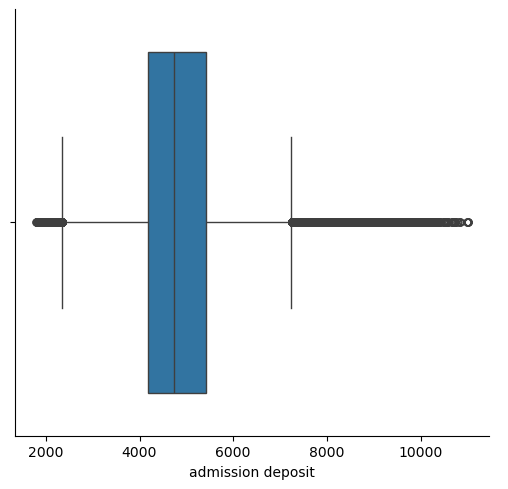

In [14]:
## Checking for Outliers using a boxplot visulization method

sns.catplot(data=Altered_HealthCareDataFrame, x = 'admission deposit', kind = 'box')
plt.show()
# chose admission deposit because it is a continous variable

In [16]:
df_clean = HealthCareDataFrame.copy()
# continous variables
var_list = ['age', 'admission deposit', 'health score']

    #caculate the iqr and if not a number then will caculate the upper and lower bounds and filter the dataset to remove the outliers
for var in var_list:
    iqr = df_clean.quantile(0.75,numeric_only=True)[var] - df_clean.quantile(0.25, numeric_only=True)[var]
    ub = df_clean.quantile(0.75, numeric_only = True)[var]+ 1.5 * iqr
    lb = df_clean.quantile(0.25, numeric_only = True)[var] - 1.5 * iqr
    df_clean = df_clean[(df_clean[var] <= ub) & (df_clean[var] >= lb)]
df_clean.head()

,case id,hospital code,hospital type code,city code hospital,hospital region code,available extra rooms in hospital,department,ward type,ward facility code,bed grade,patientid,city code patient,type of admission,severity of illness,visitors with patient,age,admission deposit,health score,stay time,stay class
0,90345,26,b,2,Y,3,gynecology,Q,D,3.0,231,1.0,trauma,moderate,12,56,3152,34,85.0,long
1,15477,29,a,4,X,4,gynecology,R,F,3.0,77514,8.0,trauma,moderate,2,37,5106,43,47.0,medium
2,52839,26,b,2,Y,6,gynecology,Q,D,3.0,60762,8.0,trauma,extreme,2,23,4819,60,17.0,short
3,17057,31,c,3,Z,3,radiotherapy,Q,A,2.0,14235,1.0,emergency,moderate,3,50,6590,55,36.0,medium
4,198733,22,g,9,Y,2,gynecology,S,B,2.0,103467,8.0,urgent,moderate,4,59,5485,43,76.0,long


In [18]:
# see how many values were deleted which is around 10,000
print(HealthCareDataFrame.shape)
print(df_clean.shape)

(318438, 20)
(305084, 20)


In [22]:
# dummy encoding cat variables for our cleaned dataset with no outliers
Categorial_Variables = ["hospital type code", "hospital region code", "department","ward type", "ward facility code", "type of admission", "severity of illness"]
df1 = pd.get_dummies(df_clean, columns = Categorial_Variables, prefix_sep='', drop_first=True)
df1.head()


,case id,hospital code,city code hospital,available extra rooms in hospital,bed grade,patientid,city code patient,visitors with patient,age,admission deposit,health score,stay time,stay class,hospital type codeb,hospital type codec,hospital type coded,hospital type codee,hospital type codef,hospital type codeg,hospital region codeY,hospital region codeZ,departmentgynecology,departmentradiotherapy,departmentsurgery,departmenttb chest disease,ward typeQ,ward typeR,ward typeS,ward typeT,ward typeU,ward facility codeB,ward facility codeC,ward facility codeD,ward facility codeE,ward facility codeF,type of admissiontrauma,type of admissionurgent,severity of illnessminor,severity of illnessmoderate
0,90345,26,2,3,3.0,231,1.0,12,56,3152,34,85.0,long,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
1,15477,29,4,4,3.0,77514,8.0,2,37,5106,43,47.0,medium,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True
2,52839,26,2,6,3.0,60762,8.0,2,23,4819,60,17.0,short,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
3,17057,31,3,3,2.0,14235,1.0,3,50,6590,55,36.0,medium,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,198733,22,9,2,2.0,103467,8.0,4,59,5485,43,76.0,long,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True


In [24]:

# viewing the new columuns along with preparting to partion and train the data
df1.columns

Index(['case id', 'hospital code', 'city code hospital',
       'available extra rooms in hospital', 'bed grade', 'patientid',
       'city code patient', 'visitors with patient', 'age',
       'admission deposit', 'health score', 'stay time', 'stay class',
       'hospital type codeb', 'hospital type codec', 'hospital type coded',
       'hospital type codee', 'hospital type codef', 'hospital type codeg',
       'hospital region codeY', 'hospital region codeZ',
       'departmentgynecology', 'departmentradiotherapy', 'departmentsurgery',
       'departmenttb chest disease', 'ward typeQ', 'ward typeR', 'ward typeS',
       'ward typeT', 'ward typeU', 'ward facility codeB',
       'ward facility codeC', 'ward facility codeD', 'ward facility codeE',
       'ward facility codeF', 'type of admissiontrauma',
       'type of admissionurgent', 'severity of illnessminor',
       'severity of illnessmoderate'],
      dtype='object')

In [203]:

# removing variables I didnt create a dummy code for or not important or output variables
var_list =['case id', 'hospital code', 'city code hospital',
       'available extra rooms in hospital', 'bed grade',
       'visitors with patient', 'age',
       'admission deposit', 'health score', 
       'hospital type codeb', 'hospital type codec', 'hospital type coded',
       'hospital type codee', 'hospital type codef', 'hospital type codeg',
       'hospital region codeY', 'hospital region codeZ',
       'departmentgynecology', 'departmentradiotherapy', 'departmentsurgery',
       'departmenttb chest disease', 'ward typeQ', 'ward typeR', 'ward typeS',
       'ward typeT', 'ward typeU', 'ward facility codeB',
       'ward facility codeC', 'ward facility codeD', 'ward facility codeE',
       'ward facility codeF', 'type of admissiontrauma',
       'type of admissionurgent', 'severity of illnessminor',
       'severity of illnessmoderate']

# Training the data
X = df1[var_list]
#output/prediction
y = df1['stay class']





In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


train accuracy: 0.7750248907062405


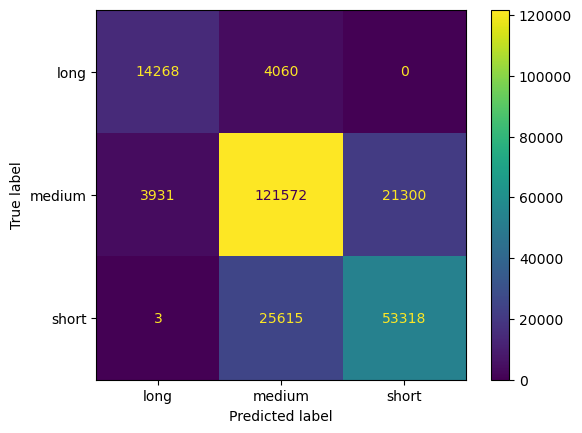

In [207]:
#setting up the classification Tree
#containing/pruning the tree by setting the max branches/
dec_tree = tree.DecisionTreeClassifier(ccp_alpha =0.0008)
dec_tree.fit(X_train, y_train)

#predicting
y_train_hat = dec_tree.predict(X_train)
print("train accuracy:", accuracy_score(y_train, y_train_hat))
# shouldnt be a perfect accuracy, possibly due to overfitting go back and fix! 



ConfusionMatrixDisplay.from_estimator(dec_tree, X_train, y_train)
plt.show()



In [211]:

print(classification_report(y_train, y_train_hat))

              precision    recall  f1-score   support

        long       0.78      0.78      0.78     18328
      medium       0.80      0.83      0.82    146803
       short       0.71      0.68      0.69     78936

    accuracy                           0.78    244067
   macro avg       0.77      0.76      0.76    244067
weighted avg       0.77      0.78      0.77    244067



In [213]:
# visulizaing the Classifcation Tree
text_representation = tree.export_text(dec_tree,feature_names=var_list)
print(text_representation)

# pdf 
dot_data = tree.export_graphviz(dec_tree, feature_names=var_list)
graph = graph_from_dot_data(dot_data)
graph.write_pdf("tree.pdf")


|--- age <= 41.50
|   |--- health score <= 47.50
|   |   |--- health score <= 38.50
|   |   |   |--- class: medium
|   |   |--- health score >  38.50
|   |   |   |--- visitors with patient <= 3.50
|   |   |   |   |--- class: medium
|   |   |   |--- visitors with patient >  3.50
|   |   |   |   |--- class: medium
|   |--- health score >  47.50
|   |   |--- visitors with patient <= 4.50
|   |   |   |--- age <= 36.50
|   |   |   |   |--- type of admissiontrauma <= 0.50
|   |   |   |   |   |--- visitors with patient <= 3.50
|   |   |   |   |   |   |--- class: short
|   |   |   |   |   |--- visitors with patient >  3.50
|   |   |   |   |   |   |--- ward typeQ <= 0.50
|   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |--- ward typeQ >  0.50
|   |   |   |   |   |   |   |--- class: short
|   |   |   |   |--- type of admissiontrauma >  0.50
|   |   |   |   |   |--- bed grade <= 2.50
|   |   |   |   |   |   |--- class: short
|   |   |   |   |   |--- bed grade >  2.50
|   |  

True

In [215]:
df1.groupby(by=['stay class']).size()

stay class
long       22839
medium    183694
short      98551
dtype: int64

test accuracy: 0.7758821312093351


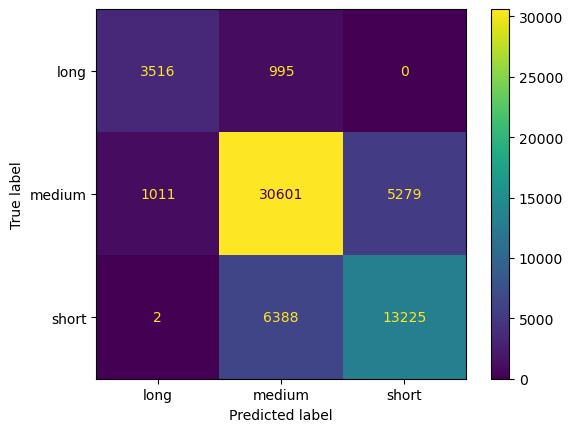

              precision    recall  f1-score   support

        long       0.78      0.78      0.78      4511
      medium       0.81      0.83      0.82     36891
       short       0.71      0.67      0.69     19615

    accuracy                           0.78     61017
   macro avg       0.77      0.76      0.76     61017
weighted avg       0.77      0.78      0.77     61017



In [217]:
#testing the model
y_test_hat = dec_tree.predict(X_test)
print("test accuracy:", accuracy_score(y_test,y_test_hat))
ConfusionMatrixDisplay.from_estimator(dec_tree, X_test, y_test)
plt.show()
print(classification_report(y_test, y_test_hat))

In [219]:
# caculating variables/feature importance and sorting it by variable

FinalDataFrame = pd.DataFrame({"Variable": var_list, "Importance": dec_tree.feature_importances_}).sort_values(by=["Importance"], ascending = False)
FinalDataFrame

,Variable,Importance
6,age,0.508379
8,health score,0.333240
5,visitors with patient,0.105493
21,ward typeQ,0.021462
4,bed grade,0.014673
31,type of admissiontrauma,0.011594
23,ward typeS,0.005160
27,ward facility codeC,0.000000
22,ward typeR,0.000000
24,ward typeT,0.000000


In [ ]:
# Age is the number 1 variable that leads to 